# 8-K Filings

Welcome. 

With this notebook you will scrape and consolidate training data from the 8-K filings.

<b> IMPORTANT </b> 
<br>
You will have to download [this](https://github.com/dbejarano31/Master-Thesis-Information-Management/blob/main/functions.py) python file from github. This file has all the functions that we have defined so far. Download it and put it in the same directory/folder as this notebook.
<br>
<br>
You will have to specify certain parameters in the following sections:
* 1.1 Querying/parsing recent 8Ks: you have to specify how many days you want to scrape. Note that the higher num_days, the more it will take for the program to work and the more filings you will download to your computer.

* 1.4 Querying stock price data: you have to specify the time deltas for the analysis. 

In [1]:
# DO NOT RUN THIS CELL
import os
path = '/Users/danielbejarano/8k filings'
os.chdir(path)

In [22]:
%run functions.py
import matplotlib.pyplot as plt
%matplotlib inline

## Querying/parsing recent 8-Ks

In [3]:
# in this cell you willd download the filings to your computer
num_days = 1##CHOOSE HOW MANY DAYS

for i in range(num_days):
    print('Scraping page', i)
    forms = get_current_events(i, '8-K')
    for link in forms['link_0']:
        try:
            docs = get_filing_documents(base_url.format(link))
            doc_link = docs.loc[docs.Type == '8-K', 'Document'].values[0]
            download_sec_documents(doc_link)
        except:
            pass

Scraping page 0


/Users/danielbejarano/8k filings/functions-Copy1.py:208: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 208 of the file /Users/danielbejarano/8k filings/functions-Copy1.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  params={'q1': days_before, 'q2': 0, 'q3': form_type}).text)
/Users/danielbejarano/8k filings/functions-Copy1.py:212: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this 

In [3]:
files = []
for file in glob('-archives*.htm'):
    files.append(file)
files

['-archives-edgar-data-1438731-000156459021005532-aljj-8k_20210211.htm',
 '-archives-edgar-data-1821175-000149315221007900-form8-k.htm',
 '-archives-edgar-data-1069308-000156459021017449-acer-8k_20210402.htm',
 '-archives-edgar-data-1569340-000164033421000755-clcs_8k.htm',
 '-archives-edgar-data-1605331-000166357721000054-abqq8k.htm',
 '-archives-edgar-data-1459417-000110465921020662-tm216246d1_8k.htm',
 '-archives-edgar-data-715446-000149315221007861-form8-k.htm',
 '-archives-edgar-data-1187953-000147793221002013-celz_8k.htm',
 '-archives-edgar-data-1846068-000119312521104243-d146986d8k.htm',
 '-archives-edgar-data-1624658-000119312521105185-d155688d8k.htm',
 '-archives-edgar-data-819793-000115752321000165-a52376872.htm',
 '-archives-edgar-data-1521945-000152194521000051-a20210402-flex8xkspecialme.htm',
 '-archives-edgar-data-1839360-000121390021019808-ea138734-8k_brileyprinc.htm',
 '-archives-edgar-data-1831617-000110465921045878-tm2035458d21_8k.htm',
 '-archives-edgar-data-868857-00

In [5]:
data = []
codes = []
dates = []
cols = ['CIK Code', 'Filing', 'Date Filed']
for file in files:
    if ((len(data)%20)==0):
        print('Read {:,} filings'.format(len(data)))
    split = file.split('-')
    CIK = split[4]
    codes.append(CIK)
    content = read_html(file)
    cleaned_content = clean_html(content)
    try:
        paragraphs = get_8k(cleaned_content)
        date = get_dates(cleaned_content)
        data.append(cleanhtml(paragraphs))
        dates.append(date)
    except:
        data.append(np.nan)
        dates.append(np.nan)

Read 0 filings


/Users/danielbejarano/8k filings/functions.py:87: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 87 of the file /Users/danielbejarano/8k filings/functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(html)
/Users/danielbejarano/8k filings/functions.py:99: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 99 of the file /Users/danielbejaran

Read 20 filings
Read 40 filings
Read 60 filings
Read 80 filings
Read 100 filings


In [6]:
df = pd.DataFrame({'CIK Code': codes, 'Filing': data, 'Date Filed': dates})
df

,CIK Code,Filing,Date Filed
0,1438731,"On February 11, 2021, ALJ Regional Holdings, I...",2021-02-11
1,1821175,NaN,NaT
2,1069308,Acer Therapeutics Inc. (the “Company”) has upd...,2021-04-02
3,1569340,NaN,NaT
4,1605331,"On February 10, 2021, we prepaid a convertible...",2021-02-09
...,...,...,...
104,1100397,NaN,NaT
105,927003,The information in this Form 8-K is furnished ...,2021-04-02
106,1036848,NaN,NaT
107,1694649,"The Platform Mortgage Loan, which constituted ...",2021-04-02


## Cleaning df

In [7]:
df['Date Filed'] = pd.to_datetime(df['Date Filed'], infer_datetime_format = True, errors = 'coerce')
df.dropna(axis = 0, how = 'any', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 108
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CIK Code    66 non-null     object        
 1   Filing      66 non-null     object        
 2   Date Filed  66 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.1+ KB


## Querying tickers from SEC

In [8]:
tickers = cach.get(base_url.format('/files/company_tickers.json')).json()
tickers = pd.DataFrame(tickers)
tickers = tickers.transpose()
tickers.columns = ['CIK Code', 'Ticker', 'CompanyName']
df['CIK Code'] = df['CIK Code'].astype(int)
tickers['CIK Code'] = tickers['CIK Code'].astype(int)
tickers.head()

,CIK Code,Ticker,CompanyName
0,320193,AAPL,Apple Inc.
1,789019,MSFT,MICROSOFT CORP
2,1018724,AMZN,AMAZON COM INC
3,1652044,GOOG,Alphabet Inc.
4,1326801,FB,Facebook Inc


In [9]:
### merging the ticker dataframe with the dataframe containing our data
train = df.merge(tickers, on = 'CIK Code', how = 'left')
train['Date Filed'] = train['Date Filed'].dt.strftime('%Y-%m-%d')
train.head()

,CIK Code,Filing,Date Filed,Ticker,CompanyName
0,1438731,"On February 11, 2021, ALJ Regional Holdings, I...",2021-02-11,ALJJ,ALJ REGIONAL HOLDINGS INC
1,1069308,Acer Therapeutics Inc. (the “Company”) has upd...,2021-04-02,ACER,Acer Therapeutics Inc.
2,1605331,"On February 10, 2021, we prepaid a convertible...",2021-02-09,ABQQ,AB INTERNATIONAL GROUP CORP.
3,715446,"OnMarch 29, 2021, following a discussion with ...",2021-03-29,ANIX,Anixa Biosciences Inc
4,1187953,"On March 31, 2021, Creative Medical Technolog...",2021-03-30,CELZ,"CREATIVE MEDICAL TECHNOLOGY HOLDINGS, INC."


## Labelling filing effect

<b> IMPORTANT </b>
<br></br>
The function to assign a label to the effect of the filing requires a time_delta parameter which specifies what is the time window you want to evaluate before/after the filing date. In the example below we use a time_delta of 7. 

In [17]:
#it may happen that the function doesn't work because the Tickers are for some reason floats and not strings, if so,
# this cell

train['Ticker'] = train['Ticker'].astype(str)

In [18]:
price_deltas = get_stats2(train, 7)
price_deltas.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BWAC: Data doesn't exist for startDate = 1605481200, endDate = 1606086000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BWAC: Data doesn't exist for startDate = 1606086000, endDate = 1606690800
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BWACW: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%*****

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VII: Data doesn't exist for startDate = 1612393200, endDate = 1612998000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*******

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Ticker,PrevAvgPriceChange,PostAvgPriceChange
0,ALJJ,0.001255,0.021445
1,ACER,0.000362,-0.002165
2,ABQQ,0.000528,-0.000520
3,ANIX,-0.050957,-0.002460
4,CELZ,-0.000213,-0.000004


In [19]:
train_final = train.merge(price_deltas, on = 'Ticker', how = 'left')
train_final.dropna(axis =0, how = 'any', inplace = True)
train_final = train_final.drop_duplicates('Ticker', keep = 'last')
train_final.reset_index(inplace = True)
train_final.drop(columns = 'index', inplace = True)
train_final.head()

,CIK Code,Filing,Date Filed,Ticker,CompanyName,PrevAvgPriceChange,PostAvgPriceChange
0,1438731,"On February 11, 2021, ALJ Regional Holdings, I...",2021-02-11,ALJJ,ALJ REGIONAL HOLDINGS INC,0.001255,0.021445
1,1069308,Acer Therapeutics Inc. (the “Company”) has upd...,2021-04-02,ACER,Acer Therapeutics Inc.,0.000362,-0.002165
2,1605331,"On February 10, 2021, we prepaid a convertible...",2021-02-09,ABQQ,AB INTERNATIONAL GROUP CORP.,0.000528,-0.000520
3,715446,"OnMarch 29, 2021, following a discussion with ...",2021-03-29,ANIX,Anixa Biosciences Inc,-0.050957,-0.002460
4,1187953,"On March 31, 2021, Creative Medical Technolog...",2021-03-30,CELZ,"CREATIVE MEDICAL TECHNOLOGY HOLDINGS, INC.",-0.000213,-0.000004


In [20]:
prev_labels = []
next_labels = []
final_labels = []

for i in range(len(train_final)):
    if train_final['PrevAvgPriceChange'][i] > 0.01:
        prev_labels.append('up')
    elif train_final['PrevAvgPriceChange'][i] < -0.01:
        prev_labels.append('down')
    else:
        prev_labels.append('stay')
        
    if train_final['PostAvgPriceChange'][i] > 0.01:
        next_labels.append('up')
    elif train_final['PostAvgPriceChange'][i] < -0.01:
        next_labels.append('down')
    else:
        next_labels.append('stay')

In [21]:
for i,j in zip(prev_labels, next_labels):
    if i == j:
        final_labels.append('neutral')
    else:
        if i == 'up':
            final_labels.append('decrease')
        elif i == 'down':
            final_labels.append('increase')
        else:
            if j == 'up':
                final_labels.append('increase')
            elif j == 'down':
                final_labels.append('decrease')

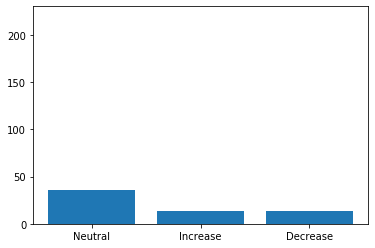

Price increased: 14 times
Price decreased: 14 times
Price did not move: 36 times


In [24]:
incr_counts = 0
decr_counts = 0
neutral_counts = 0

for i in final_labels:
    if i == 'neutral':
        neutral_counts += 1
    elif i == 'increase':
        incr_counts += 1

decr_counts = len(train_final) - (incr_counts + neutral_counts)        

counts = [neutral_counts, incr_counts, decr_counts]
labels = ['Neutral', 'Increase', 'Decrease']

plt.bar(labels, counts)
plt.ylim([0,230]) # change the scale of y-axis here
plt.show()

print('Price increased: {} times'.format(incr_counts))
print('Price decreased: {} times'.format(decr_counts))
print('Price did not move: {} times'.format(neutral_counts))

If you want to change the scale of the y-axis see the code above. 

In [25]:
train_final.insert(7, 'Label', final_labels)
train_final.head()

,CIK Code,Filing,Date Filed,Ticker,CompanyName,PrevAvgPriceChange,PostAvgPriceChange,Label
0,1438731,"On February 11, 2021, ALJ Regional Holdings, I...",2021-02-11,ALJJ,ALJ REGIONAL HOLDINGS INC,0.001255,0.021445,increase
1,1069308,Acer Therapeutics Inc. (the “Company”) has upd...,2021-04-02,ACER,Acer Therapeutics Inc.,0.000362,-0.002165,neutral
2,1605331,"On February 10, 2021, we prepaid a convertible...",2021-02-09,ABQQ,AB INTERNATIONAL GROUP CORP.,0.000528,-0.000520,neutral
3,715446,"OnMarch 29, 2021, following a discussion with ...",2021-03-29,ANIX,Anixa Biosciences Inc,-0.050957,-0.002460,increase
4,1187953,"On March 31, 2021, Creative Medical Technolog...",2021-03-30,CELZ,"CREATIVE MEDICAL TECHNOLOGY HOLDINGS, INC.",-0.000213,-0.000004,neutral


In [ ]:
train_final.to_csv('final-data-8K', encoding = 'utf-8')